In [1]:
"""
Plan wykonania zadania
1) wczytanie modułow i dataseta
2) analoiza zmienej po ktorej testójemy (Sale Price)
3) analiza wielu zmiennych
4) wstawienie dodatkowych dancy i czyszcznie
5) Feature Transformation/Engineering
6) Modelowanie i przewidzenie
"""

'\nPlan wykonania zadania\n1) wczytanie modułow i dataseta\n2) analoiza zmienej po ktorej testójemy (Sale Price)\n3) analiza wielu zmiennych\n4) wstawienie dodatkowych dancy i czyszcznie\n5) Feature Transformation/Engineering\n6) Modelowanie i przewidzenie\n'

# 1) wczytanie modułow i dataseta

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings
import xgboost as xgb
import lightgbm as lgb
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from scipy.stats import norm
from collections import Counter
from sklearn.linear_model import LinearRegression,LassoCV, Ridge, LassoLarsCV,ElasticNetCV
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, Normalizer, RobustScaler
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb
warnings.filterwarnings('ignore')
sns.set(style='white', context='notebook', palette='deep')
%matplotlib inline
%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook

In [3]:
data_train = pd.read_csv('data/train.csv')
data_test = pd.read_csv('data/test.csv')
# small rename
data_train = data_train.rename(index=str, columns={"1stFlrSF": "firstFlrSF", "2ndFlrSF": "secndFlrSF"})
data_test = data_test.rename(index=str, columns={"1stFlrSF": "firstFlrSF", "2ndFlrSF": "secndFlrSF"})
data_train.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1072,1073,50,RL,50.0,7585,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Normal,91500
1105,1106,60,RL,98.0,12256,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,325000
1329,1330,60,RL,63.0,9084,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,176500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
799,800,50,RL,60.0,7200,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal,175000


In [4]:
# zapisujemy oraz wyrzucamy kolumne z id bo nie jest nam potrzebna
# zapisujemy kolumne z id
data_train_id = data_train['Id']
data_test_id = data_test['Id']
data_train.drop("Id", axis = 1, inplace = True)
data_test.drop("Id", axis = 1, inplace = True)
data_train.sample(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1119,20,RL,70.0,7560,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdWo,NaN,0,7,2006,WD,Normal,133700
782,20,RL,67.0,16285,Pave,NaN,IR2,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2009,WD,Normal,187100
562,30,RL,63.0,13907,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,108000
369,20,RL,NaN,9830,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,162000
489,180,RM,21.0,1526,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,86000


# 2) analoiza zmienej po ktorej testójemy (Sale Price)

In [5]:
data_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


 mu = 180921.20 and sigma = 79415.29



Text(0.5,1,'SalePrice distribution')

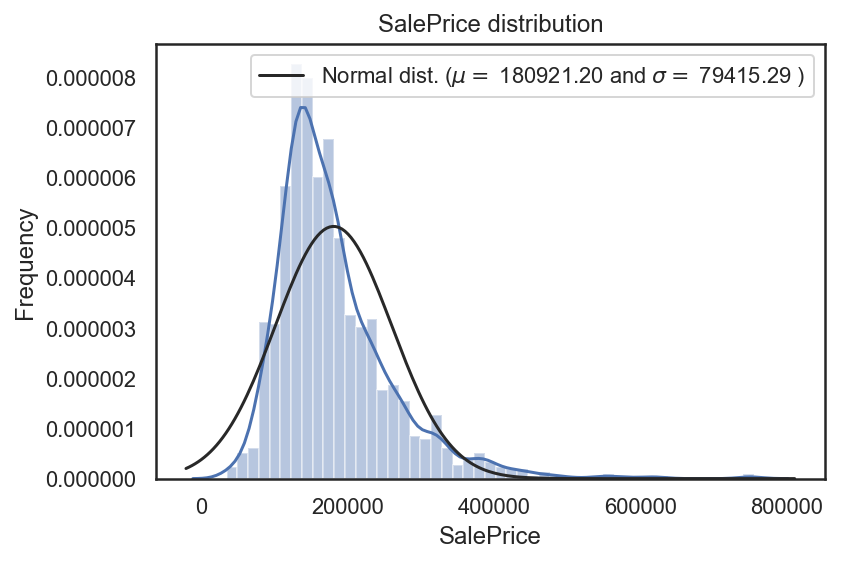

In [6]:
# robimy histogram
sns.distplot(data_train['SalePrice'], fit=norm);
(mu, sigma) = norm.fit(data_train['SalePrice'])
# print mean and std
print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

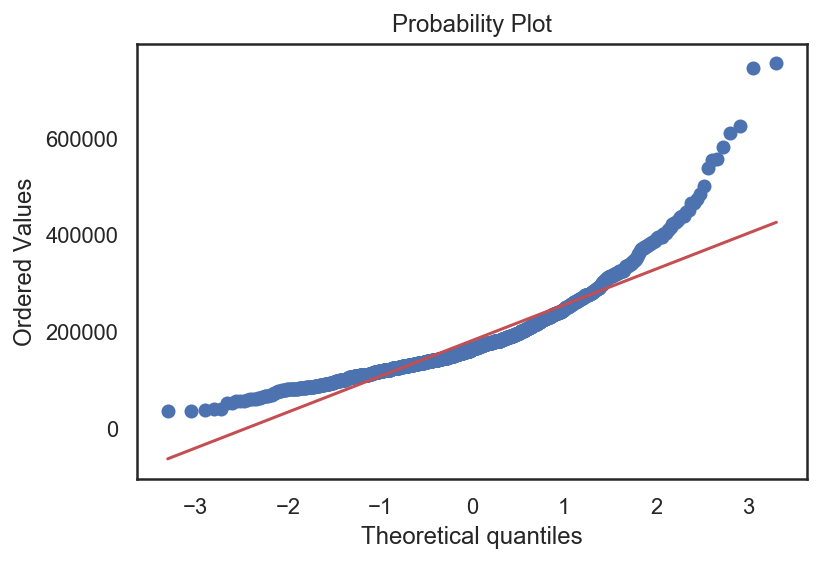

Skewness: 1.882876
Kurtosis: 6.536282


In [7]:
fig = plt.figure()
res = stats.probplot(data_train['SalePrice'], plot=plt)
plt.show()
print("Skewness: %f" % data_train['SalePrice'].skew())
print("Kurtosis: %f" % data_train['SalePrice'].kurt())
# z tego wynika że nasz sprzedarz nie ma normalniej dystrybuji, a chcemy zeby byla to normalna dysrybucja

# 3) analiza wielu zmiennych (reszty)

In [8]:
# wyswietlamy ktore kolumny sa kategoryczne
data_train.select_dtypes(include=[object]).columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [9]:
# numeryczne
data_train.select_dtypes(include=['int64', 'float64']).columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'firstFlrSF', 'secndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [10]:
cat = len(data_train.select_dtypes(include=[object]).columns)
num = len(data_train.select_dtypes(include=['int64', 'float64']).columns)
print(cat, 'cat', '+', num, 'num', '=', cat+num)

43 cat + 37 num = 80


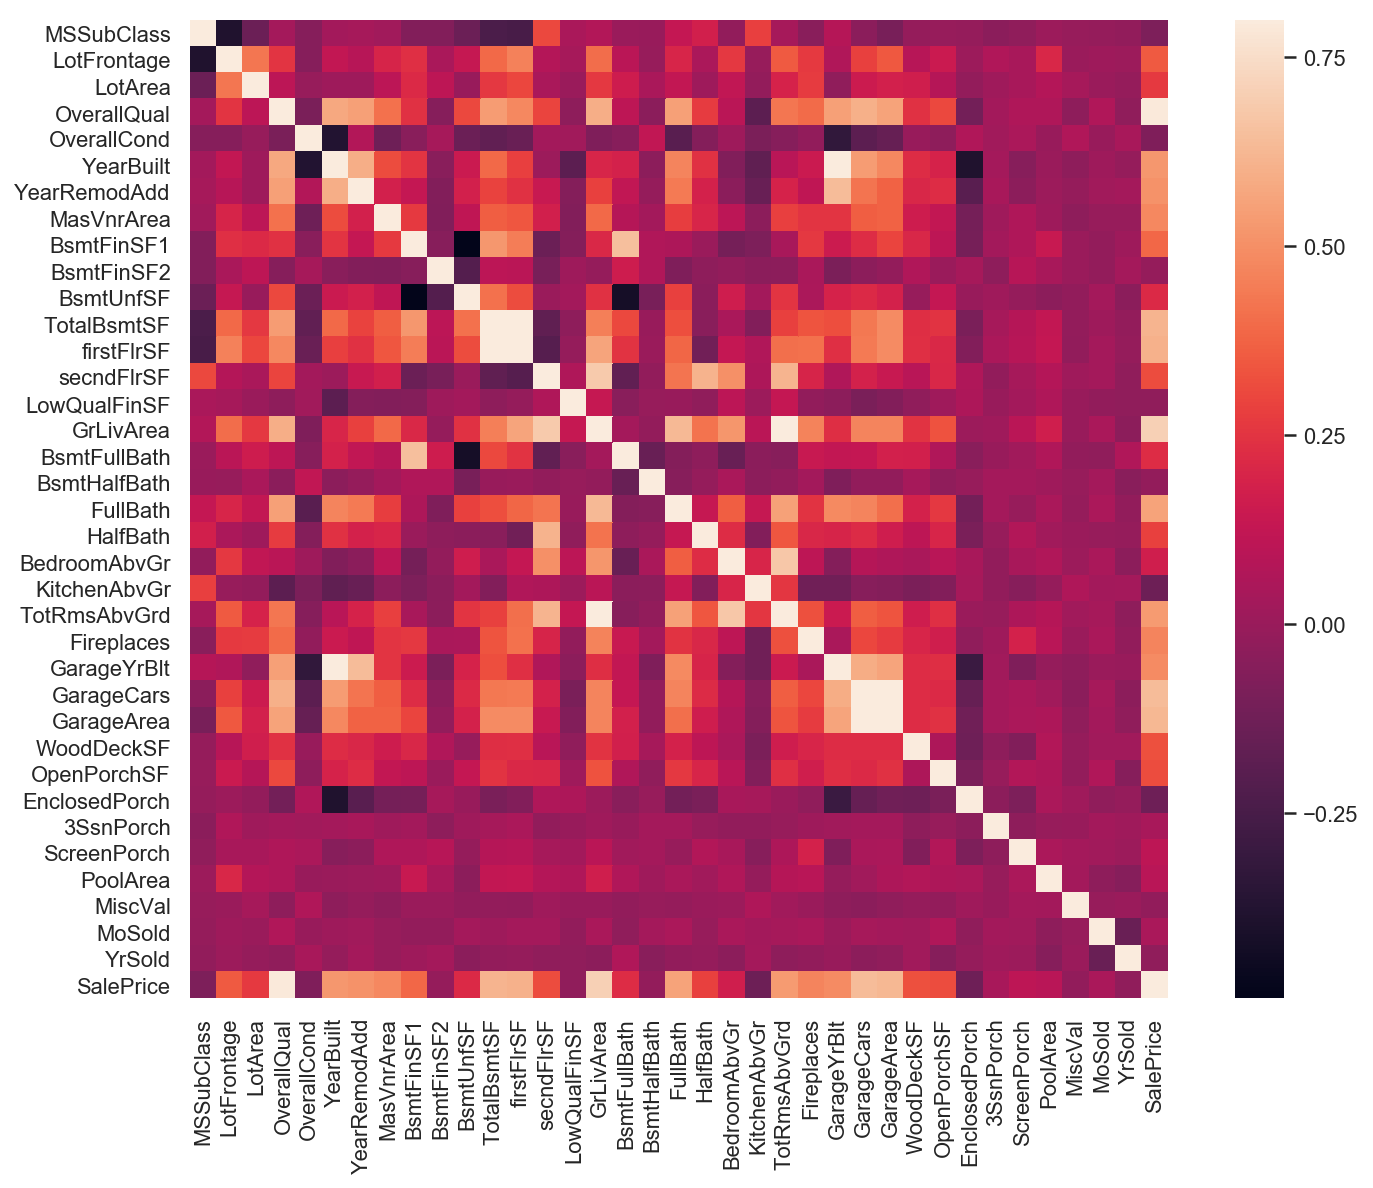

In [11]:
# uzyjemy maciezy korelaji żeby zobaczyć wpłwy pojedynczych zmienncyh na cene
corrmat = data_train.corr()
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(corrmat, vmax=0.8, square=True)
# na heat mapie patrzymy na ostatnia kolumne czyli salePrice
# im bielszy kwadrat tym zmienna ma wiekszy wpływ na jego wartosc
# trzeba zmniejszyc ilosc zmiennych poniewaz wykres jest trobno czytelny

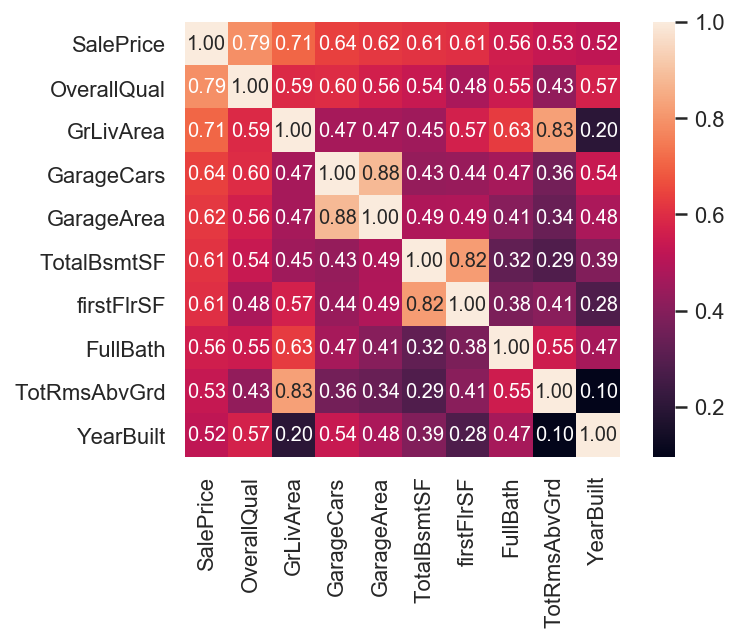

In [12]:
# top k jak w polo TV
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data_train[cols].values.T)
# rozmiar czcionki na osiach
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f',
                annot_kws = {'size' : k}, yticklabels = cols.values,
                 xticklabels = cols.values)
plt.show()

In [13]:
# dobra zbieramy ktore kolumny sa najbardziej skorelowane
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most correlated']
most_corr

,Most correlated
0,SalePrice
1,OverallQual
2,GrLivArea
3,GarageCars
4,GarageArea
5,TotalBsmtSF
6,firstFlrSF
7,FullBath
8,TotRmsAbvGrd
9,YearBuilt


(-0.5, 9.5, 0, 800000)

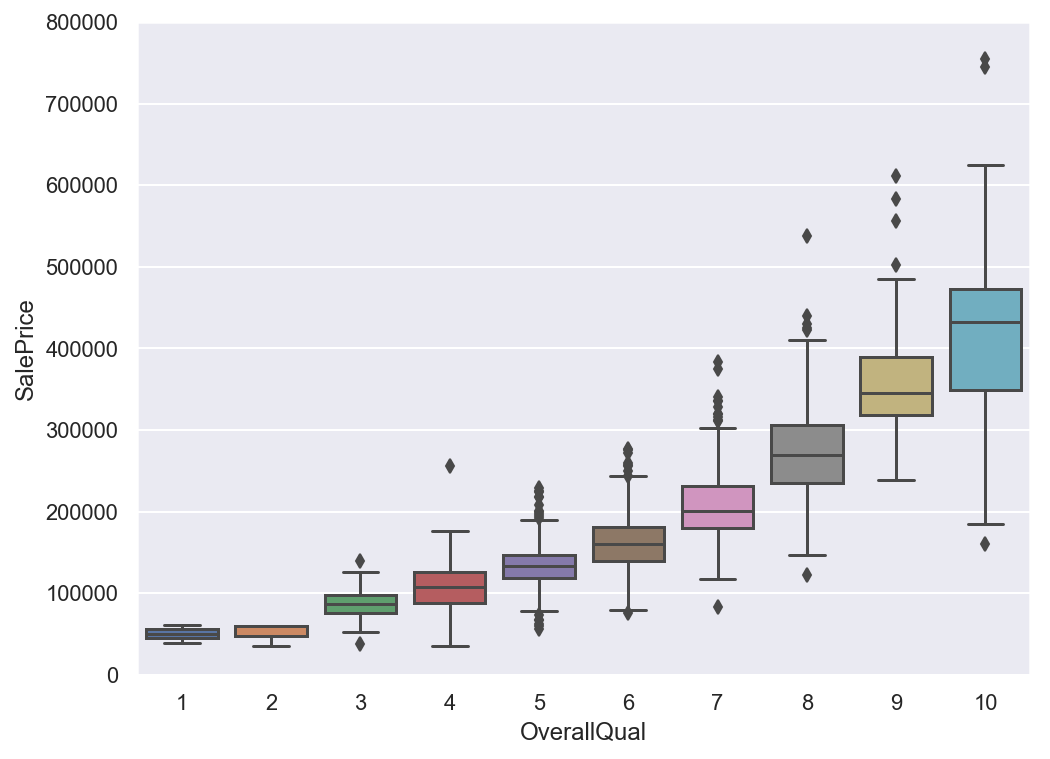

In [14]:
# teraz analizujemy kazdu prametr osobno
# OverallQual
var = 'OverallQual'
target = 'SalePrice'
# robimy 1 zbiur danych
data = pd.concat([data_train[target], data_train[var]], axis = 1)
# definiujemy wielkosc naszego wykresu
f, ax = plt.subplots(figsize = (8,6))
# dajemy nasze dane so seaborn i mowimy ktora osi to x i y
fig = sns.boxplot(x = var, y = target, data=data)
# limity dla osi y
fig.axis(ymin = 0, ymax = 800000)
# im ludzie wiedzej wydaja tym wiekszy jest rozrzut wartosci 

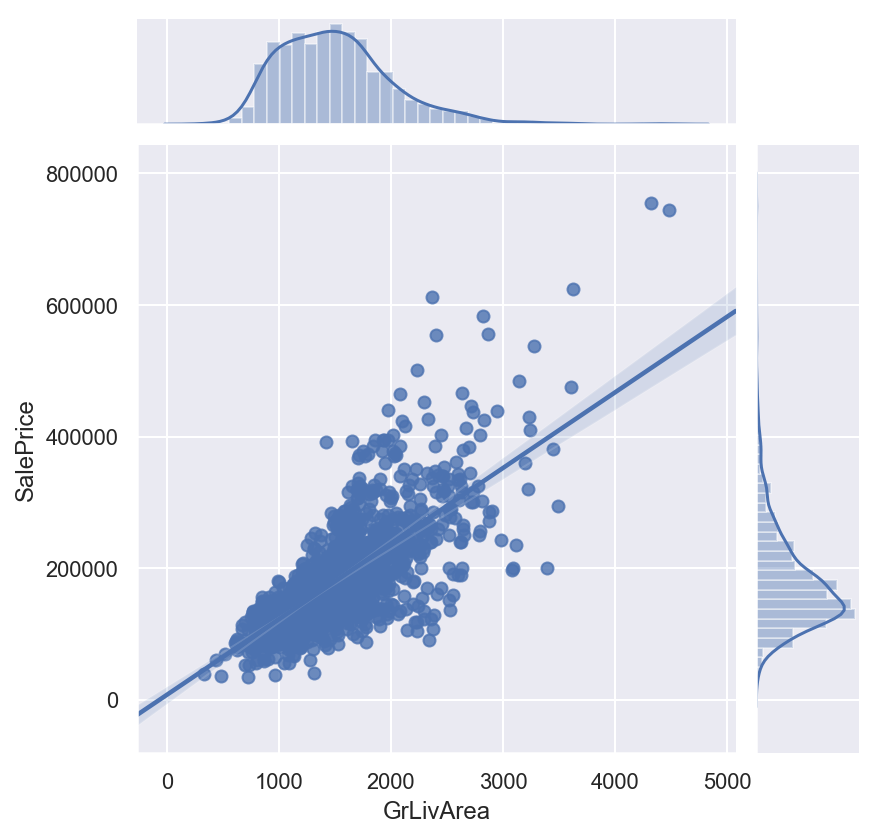

In [15]:
# teraz analizujemy kazdu prametr osobno
# Living Area
var = 'GrLivArea'
target = 'SalePrice'
#sns.jointplot(x = data_train[var], y = data_train[target], kind = 'reg')
# wszytko fajnie ale 2 ponkty nie pasoja trzeba sie ich pozbyc bo zepsoja model
data_train = data_train.drop(data_train[(data_train['GrLivArea']>4000) 
                                        & (data_train['SalePrice']<300000)].index).reset_index(drop=True)
sns.jointplot(x = data_train[var], y = data_train[target], kind = 'reg')

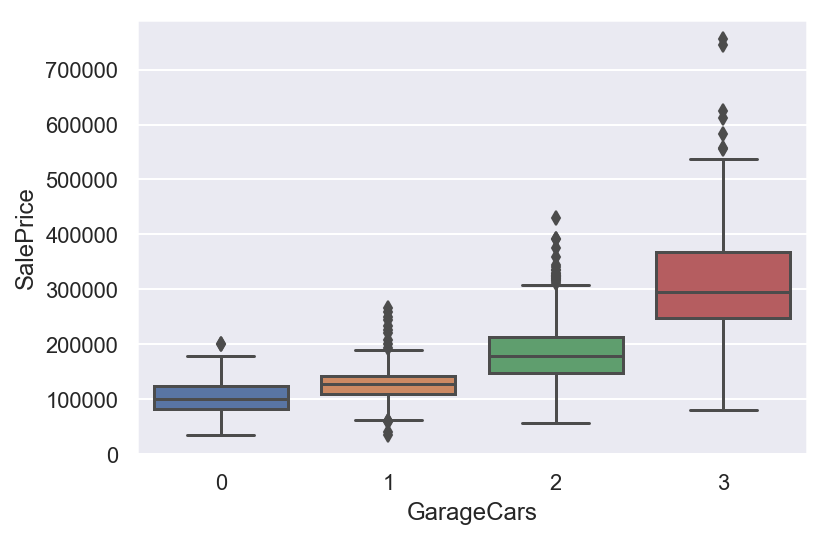

In [16]:
# teraz analizujemy kazdu prametr osobno
# Garage Cars
var = 'GarageCars'
target = 'SalePrice'
#fig = sns.boxplot(x = data_train[var], y = data_train[target])
# cena rosnie az do 4, czyli trzeba to usunac
data_train = data_train.drop(data_train[(data_train[var]>3)].index).reset_index(drop=True)
fig = sns.boxplot(x = data_train[var], y = data_train[target])

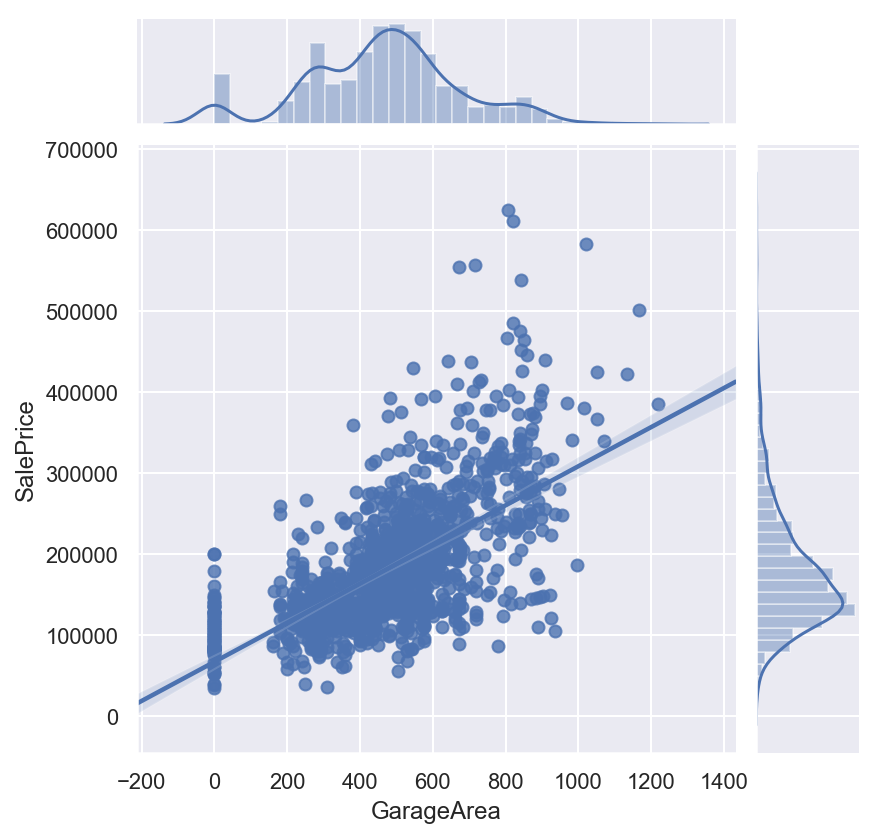

In [17]:
# teraz analizujemy kazdu prametr osobno
# Garage Area
var = 'GarageArea'
target = 'SalePrice'
#fig = sns.jointplot(x = data_train[var], y = data_train[target], kind = 'reg')
# usuwamy 2 punkty na dole
data_train = data_train.drop(data_train[(data_train['GarageArea']>1000) 
                                        & (data_train['SalePrice']<300000)].index).reset_index(drop=True)
# usuwamy 2 punkty na gorze
data_train = data_train.drop(data_train[(data_train['SalePrice']>700000)].index).reset_index(drop=True)
fig = sns.jointplot(x = data_train[var], y = data_train[target], kind = 'reg')

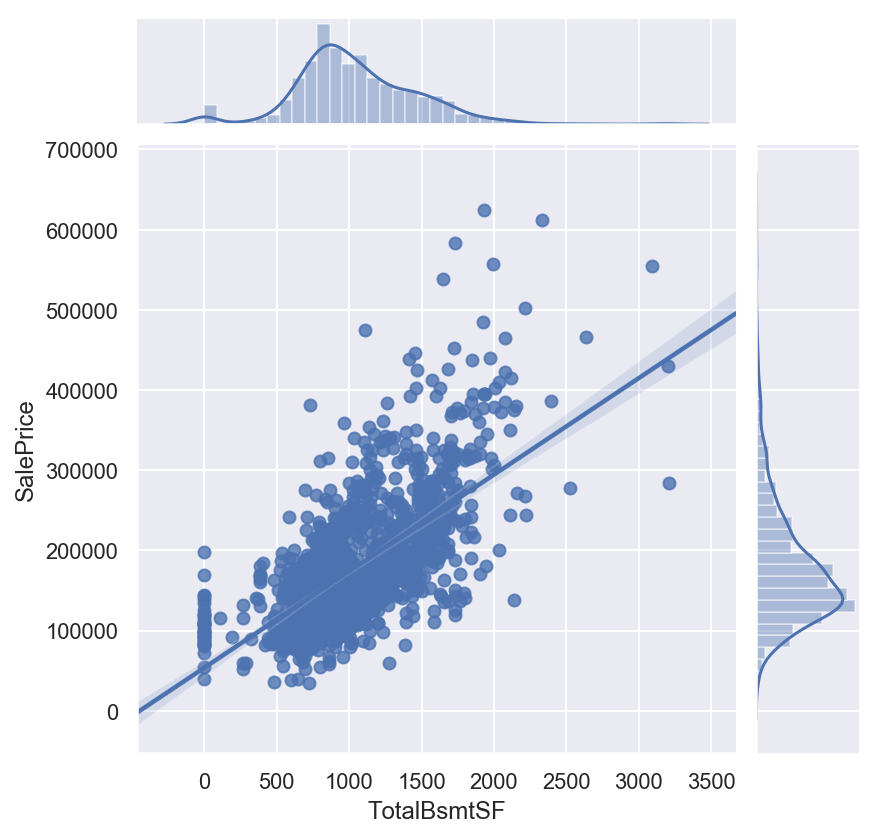

In [18]:
# teraz analizujemy kazdu prametr osobno
# Basement Area
var = 'TotalBsmtSF'
target = 'SalePrice'
sns.jointplot(x=data_train[var], y=data_train[target], kind='reg')

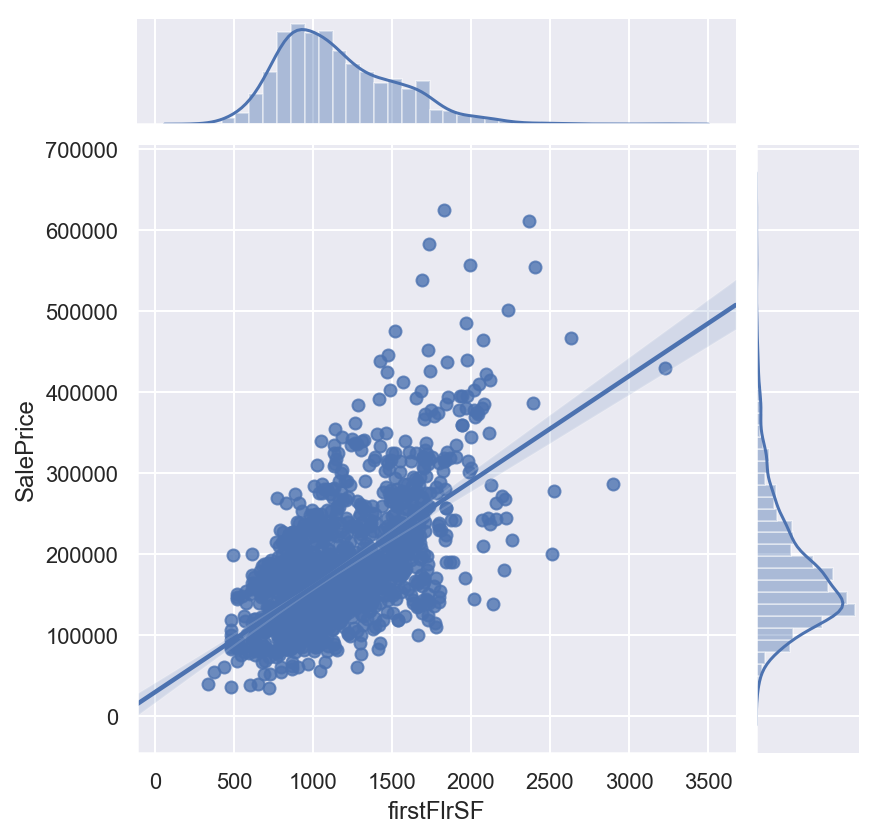

In [19]:
# teraz analizujemy kazdu prametr osobno
# First Floor Area
var = 'firstFlrSF'
target = 'SalePrice'
sns.jointplot(x=data_train[var], y=data_train[target], kind='reg')

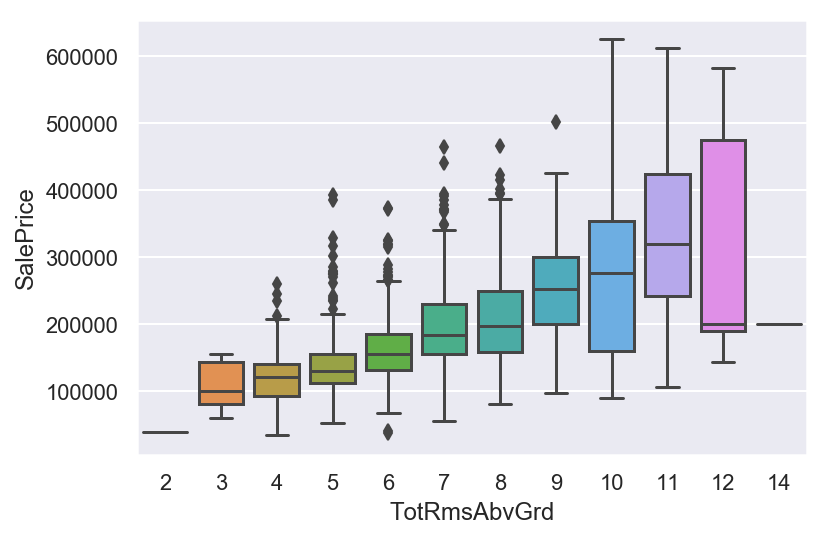

In [20]:
# teraz analizujemy kazdu prametr osobno
# Total Rooms
var = 'TotRmsAbvGrd'
target = 'SalePrice'
sns.boxplot(x=data_train[var], y=data_train[target])

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

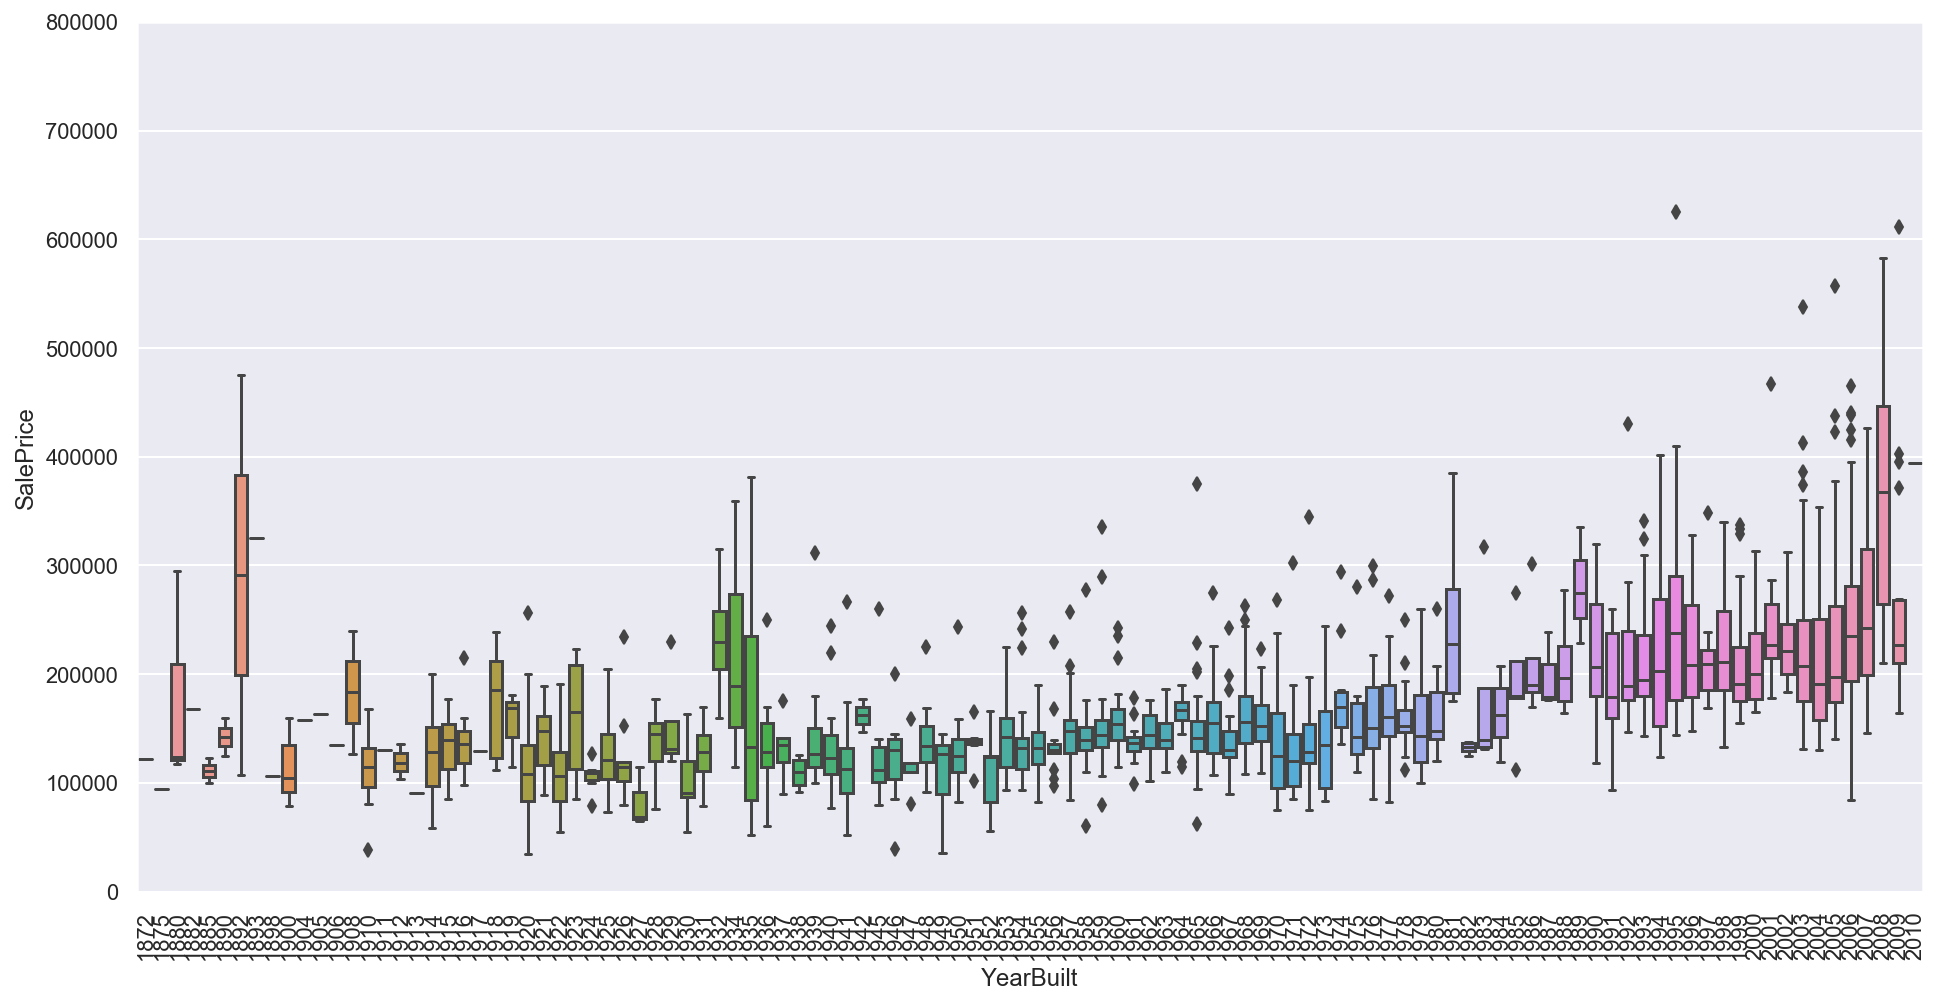

In [21]:
# teraz analizujemy kazdu prametr osobno
# Year Built
var = 'YearBuilt'
target = 'SalePrice'
data = pd.concat([data_train[target], data_train[var]], axis = 1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x = var, y = target, data = data)
fig.axis(ymin = 0, ymax = 800000);
plt.xticks(rotation = 90)

# 4 uzupełnaimy braki oraz czyscimy dane

In [22]:
ntrain = data_train.shape[0]
ntest = data_test.shape[0]
y_train = data_train.SalePrice.values
all_data = pd.concat((data_train, data_test)).reset_index(drop=True)
all_data.drop(['SalePrice'], axis=1, inplace=True)

In [23]:
# teraz sprawdzamny jakie mamy braki w danych
all_data_na = (all_data.isnull().sum()/len(all_data)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending =False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
PoolQC,99.724613
MiscFeature,96.419966
Alley,93.218589
Fence,80.413081
FireplaceQu,48.743546
LotFrontage,16.695353
GarageQual,5.473322
GarageCond,5.473322
GarageFinish,5.473322
GarageYrBlt,5.473322


Text(0.5,1,'Percent missing data by feature')

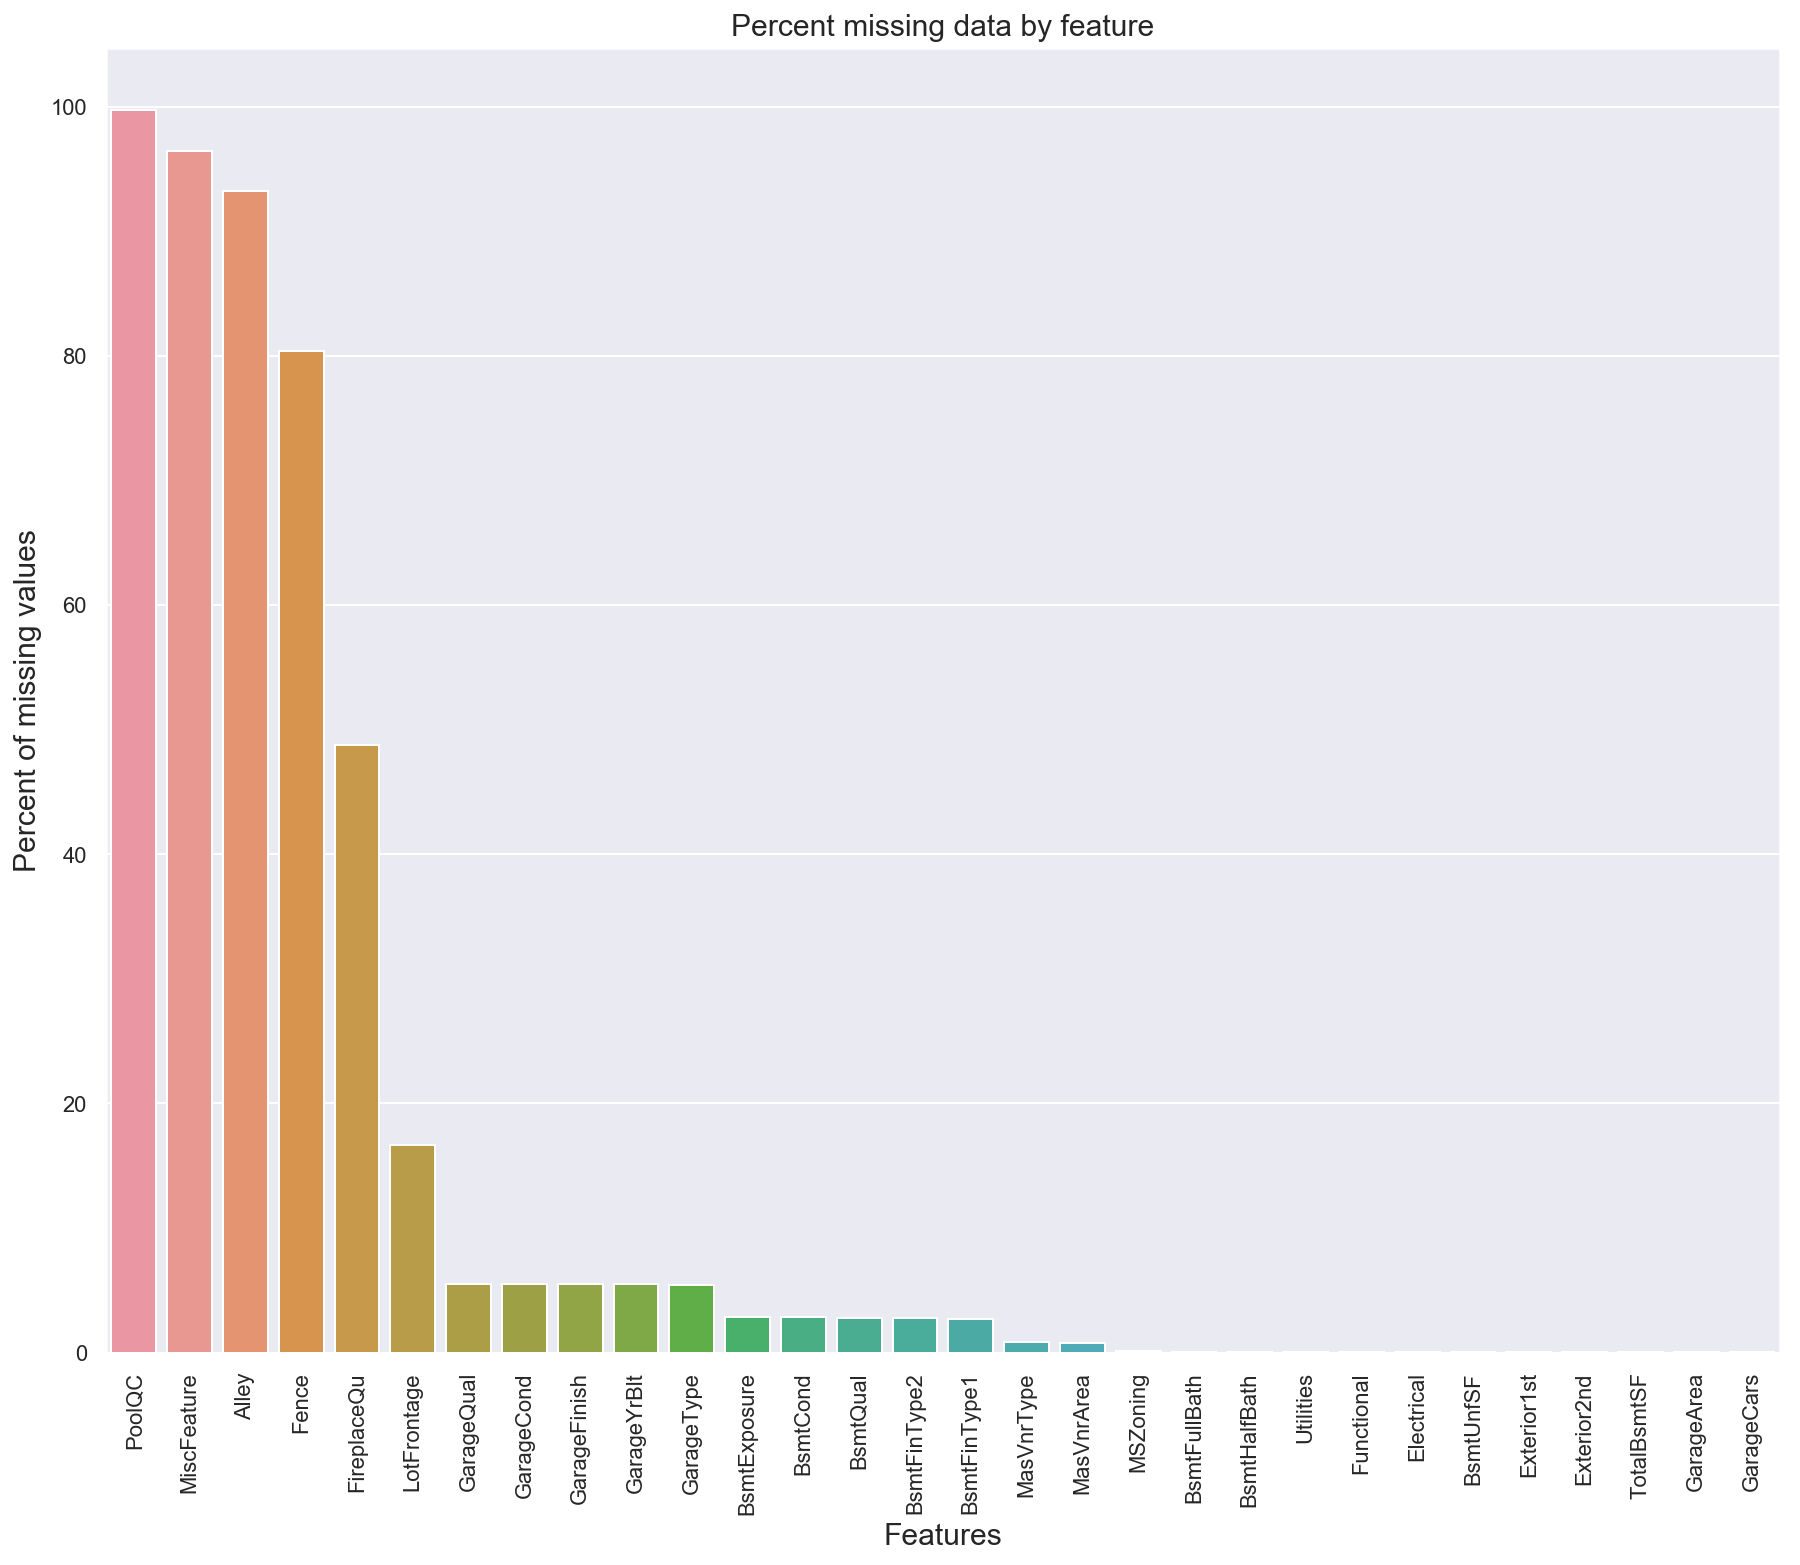

In [24]:
# procent brakujacyh wartosci
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [25]:
# bd duzo roboty
# Na nie ma basenu itd.
all_data["PoolQC"] = all_data["PoolQC"].fillna("None")
all_data["MiscFeature"] = all_data["MiscFeature"].fillna("None")
all_data["Alley"] = all_data["Alley"].fillna("None")
all_data["Fence"] = all_data["Fence"].fillna("None")
all_data["FireplaceQu"] = all_data["FireplaceQu"].fillna("None")
# ulice do domow raczej sa srednie wiec mediana
all_data["LotFrontage"] = all_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
# typ garazu jak brak to none
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all_data[col] = all_data[col].fillna('None')
# rozmiary garaz jak nie ma to 0 
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all_data[col] = all_data[col].fillna(0)
# rozmiary piwnic ja nie ma to 0
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all_data[col] = all_data[col].fillna(0)
# typy piwnicy jak brak to none
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all_data[col] = all_data[col].fillna('None')
# jakis  dotatek
all_data["MasVnrType"] = all_data["MasVnrType"].fillna("None")
all_data["MasVnrArea"] = all_data["MasVnrArea"].fillna(0)
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])
# nie potrzebne
all_data = all_data.drop(['Utilities'], axis=1)
all_data["Functional"] = all_data["Functional"].fillna("Typ")
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna(all_data['Exterior2nd'].mode()[0])
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])
all_data['MSSubClass'] = all_data['MSSubClass'].fillna("None")

In [26]:
# sprawdzamy cz jest jeszcze jakie nan
all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
# wurzucamy wszystkie ktore sa pelne
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)
all_data_na
# i czysto

Series([], dtype: float64)

# 5) Feature  enginering

In [27]:
# MSSubClass jest clasowe z zostalo interpretowane
"""
    20 1-STORY 1946 & NEWER ALL STYLES
    30 1-STORY 1945 & OLDER
    40 1-STORY W/FINISHED ATTIC ALL AGES
    45 1-1/2 STORY - UNFINISHED ALL AGES
    50 1-1/2 STORY FINISHED ALL AGES
    60 2-STORY 1946 & NEWER
    70 2-STORY 1945 & OLDER
    75 2-1/2 STORY ALL AGES
    80 SPLIT OR MULTI-LEVEL
    85 SPLIT FOYER
    90 DUPLEX - ALL STYLES AND AGES
    120 1-STORY PUD (Planned Unit Development) - 1946 & NEWER
    150 1-1/2 STORY PUD - ALL AGES
    160 2-STORY PUD - 1946 & NEWER
    180 PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
    190 2 FAMILY CONVERSION - ALL STYLES AND AGES
"""
all_data['MSSubClass'].describe() #to udwanadnia identyfikacji jako numery

count    2905.000000
mean       57.092943
std        42.524806
min        20.000000
25%        20.000000
50%        50.000000
75%        70.000000
max       190.000000
Name: MSSubClass, dtype: float64

In [28]:
# z int na str
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)

In [29]:
# tez interperetowane jako liczba 
all_data['OverallCond'] = all_data['OverallCond'].astype(str)

In [30]:
# lata tez interpretowane jako liczby
all_data['YrSold'] = all_data['YrSold'].astype(str)
all_data['MoSold'] = all_data['MoSold'].astype(str)

In [31]:
# teraz enkodowanie zmiennych kategorycznych
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

In [32]:
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(all_data[c].values)) 
    all_data[c] = lbl.transform(list(all_data[c].values))

In [33]:
# dodajemy calkowia powieszchnie domu 
# "1stFlrSF": "firstFlrSF", "2ndFlrSF": "secndFlrSF"
all_data['TotalSF'] = all_data['TotalBsmtSF'] + all_data['firstFlrSF'] + all_data['secndFlrSF']

In [34]:
# teraz przerabiamy dane by byly bardziej w rozkladzie normalnym
data_train["SalePrice"] = np.log1p(data_train["SalePrice"])


 mu = 12.02 and sigma = 0.40



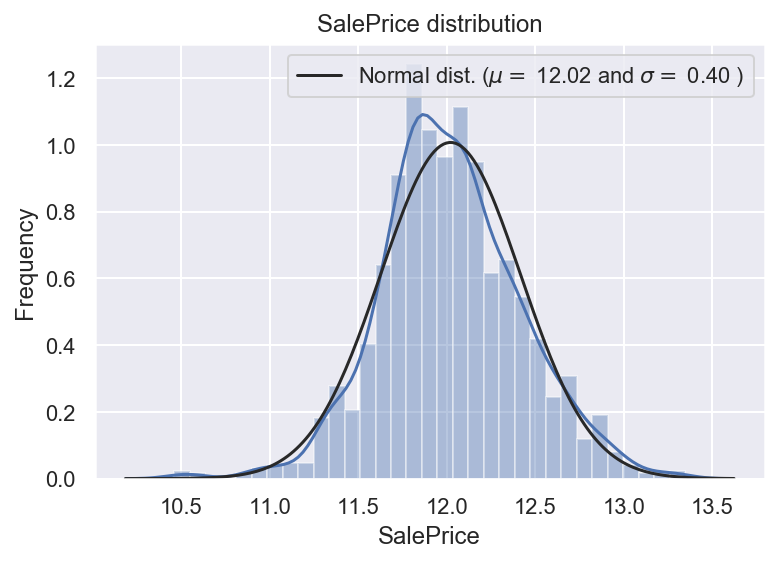

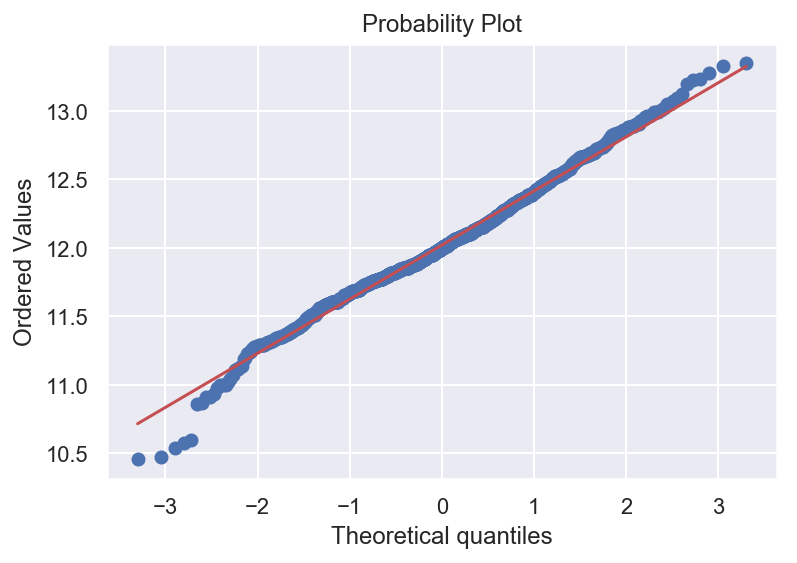

In [35]:
# sprawdzamy dystrybucje
sns.distplot(data_train['SalePrice'], fit=norm)
(mu, sigma) = norm.fit(data_train['SalePrice'])
(mu, sigma) = norm.fit(data_train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

fig = plt.figure()
res = stats.probplot(data_train['SalePrice'], plot=plt)
plt.show()

y_train = data_train.SalePrice.values
# w porowaniu z wykresami z ponktu 2 jest zajebisty rozklad

In [36]:
# sprawdzamy niedoskonalosc od roykladu normalnego reszy zmiennych
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index
skewed_feats = all_data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skewed Features' :skewed_feats})
skewness.head()

,Skewed Features
MiscVal,21.904223
PoolArea,18.669449
LotArea,13.162116
LowQualFinSF,12.059175
3SsnPorch,11.348142


In [37]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2905, 220)


In [38]:
# wzwalamy zmienne ktore zabardzo sie ruznia 
skewness = skewness[abs(skewness) > 0.75]
# transformacja i dorzucenie do
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all_data[feat] = boxcox1p(all_data[feat], lam)
    all_data[feat] += 1

In [39]:
all_data = pd.get_dummies(all_data)
print(all_data.shape)

(2905, 220)


In [40]:
# rozdzielamy dane
data_train = all_data[:ntrain]
data_test = all_data[ntest:]

# 6) model

In [41]:
# cross validation z 5
# puszcza nam kazdy model
n_folds = 5
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(data_train.values)
    rmse= np.sqrt(-cross_val_score(model, data_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [42]:
# teraz leca modele nie ustalalem hiperparametrow ale bd sie tym zajmowal w automl
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [43]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [44]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree = 2, coef0= 2.5)

In [45]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, 
                             learning_rate=0.05, max_depth=6, 
                             min_child_weight=1.5, n_estimators=7200,
                             reg_alpha=0.9, reg_lambda=0.6,
                             subsample=0.2,seed=42, silent=1,
                             random_state =7)

In [46]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [47]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [48]:
%%time
# wynik
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))
# tutaj widac ze Xgboost narazie wygrywa


Lasso score: 0.1108 (0.0071)

ElasticNet score: 0.1107 (0.0071)

Kernel Ridge score: 0.1149 (0.0074)

Gradient Boosting score: 0.1163 (0.0059)

Xgboost score: 0.1191 (0.0052)

LGBM score: 0.1138 (0.0054)



In [49]:
# teraz bierzemy modele i robimy srednia z ich przewidzeń
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
    # clonujemy modele i fitujemy w nie dane
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        #  trenujemy kolony
        for model in self.models_:
            model.fit(X, y)
        return self
    # przewidujemy za pomoca klonow i robimy ich srednia
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_])
        return np.mean(predictions, axis=1)  
    

In [50]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

In [51]:
%%time
score = rmsle_cv(averaged_models)

In [52]:
print("Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Averaged base models score: 0.1082 (0.0068)

